In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
restaurants  = pd.read_csv('restaurants.csv')
restaurants.head()

,SHOP_ID,CATEGORY,NAME,RATING,PRICE,REVIEW_COUNT,ADDRESS,OPEN_HOURS,BUSY_HOURS
0,100001,Coffee shop,Java Lounge - Fort - Sri Lanka's Largest Coffe...,4.1,$$,245.0,7 Hospital St~ Colombo 00100,"[""Friday~ 7AM to 11:45PM; Saturday~ 7AM to 11:...",['0% busy at 6 AM.'~ '0% busy at 7 AM.'~ '4% b...
1,100002,Cafe,The Commons Coffee House at Hatch,4.1,NaN,50.0,Colombo,"[""Friday~ 8AM to 7PM; Saturday~ 8AM to 3PM; Su...",NaN
2,100003,Cafe,The t-Lounge by Dilmah,4.4,$$,780.0,Chatham St~ Colombo 00100,"[""Friday~ 8AM to 9PM; Saturday~ 8AM to 9PM; Su...",['0% busy at 6 AM.'~ '0% busy at 7 AM.'~ '14% ...
3,100004,Coffee shop,Goodies,4.3,$$,68.0,117 Colombo - Batticaloa Hwy~ Colombo,"[""Friday~ 7:30AM to 9PM; Saturday~ 7:30AM to 9...",NaN
4,100005,Cafe,Barista World Trade Center,4.2,$$,282.0,Level 3 World Trade Center~ Bank of Ceylon Maw...,"[""Friday~ 7AM to 7PM; Saturday~ 7AM to 5PM; Su...",['% busy at .'~ '0% busy at 6 AM.'~ '18% busy ...


In [98]:
restaurants.shape

(79, 9)

In [99]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SHOP_ID       79 non-null     int64  
 1   CATEGORY      79 non-null     object 
 2   NAME          79 non-null     object 
 3   RATING        75 non-null     float64
 4   PRICE         30 non-null     object 
 5   REVIEW_COUNT  75 non-null     float64
 6   ADDRESS       79 non-null     object 
 7   OPEN_HOURS    63 non-null     object 
 8   BUSY_HOURS    39 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ KB


In [100]:
restaurants.columns

Index(['SHOP_ID', 'CATEGORY', 'NAME', 'RATING', 'PRICE', 'REVIEW_COUNT',
       'ADDRESS', 'OPEN_HOURS', 'BUSY_HOURS'],
      dtype='object')

In [101]:
missing_vals = restaurants.isnull().sum()


In [102]:
missing_vals

SHOP_ID          0
CATEGORY         0
NAME             0
RATING           4
PRICE           49
REVIEW_COUNT     4
ADDRESS          0
OPEN_HOURS      16
BUSY_HOURS      40
dtype: int64

In [103]:
restaurants[restaurants['RATING'].isnull()]

,SHOP_ID,CATEGORY,NAME,RATING,PRICE,REVIEW_COUNT,ADDRESS,OPEN_HOURS,BUSY_HOURS
35,100036,Add phone number,Burger Waves,NaN,NaN,NaN,25 Watarappala Rd~ Dehiwala-Mount Lavinia,NaN,NaN
49,100050,Add hours,Lucky Kiri~ Ice Cream Parlor,NaN,NaN,NaN,245 Templers Rd~ Dehiwala-Mount Lavinia,NaN,NaN
73,100074,Add hours,Annaluxmy Vegetarian,NaN,NaN,NaN,No 305 Hill St~ Dehiwala-Mount Lavinia,NaN,NaN
78,100079,Add phone number,Sri Kumaran's New Veggie Restaurant,NaN,NaN,NaN,Templers Rd~ Dehiwala-Mount Lavinia,NaN,NaN


In [104]:
restaurantsTemp = restaurants.dropna(subset=['RATING'])

In [105]:
restaurantsTemp[restaurantsTemp['RATING'].isnull()]

,SHOP_ID,CATEGORY,NAME,RATING,PRICE,REVIEW_COUNT,ADDRESS,OPEN_HOURS,BUSY_HOURS


In [106]:
restaurantsTemp[restaurantsTemp['REVIEW_COUNT'].isnull()]

,SHOP_ID,CATEGORY,NAME,RATING,PRICE,REVIEW_COUNT,ADDRESS,OPEN_HOURS,BUSY_HOURS


In [107]:
from sklearn.preprocessing import LabelEncoder
restaurantsTemp.shape[1]
print(restaurantsTemp['PRICE'].unique())

['$$' nan '$' '$$$' '$$$$']


In [108]:
import numpy as np
restaurantsTemp['PRICE'] = np.where(restaurantsTemp.PRICE == '$', 500, restaurantsTemp.PRICE)
restaurantsTemp['PRICE'] = np.where(restaurantsTemp.PRICE == '$$', 1000, restaurantsTemp.PRICE)
restaurantsTemp['PRICE'] = np.where(restaurantsTemp.PRICE == '$$$', 2000, restaurantsTemp.PRICE)
restaurantsTemp['PRICE'] = np.where(restaurantsTemp.PRICE == '$$$$', 4000, restaurantsTemp.PRICE)
restaurantsTemp['PRICE'] = np.where(restaurantsTemp.PRICE == NaN, -1, restaurantsTemp.PRICE)

<ipython-input-108-c4bb3b02f5e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurantsTemp['PRICE'] = np.where(restaurantsTemp.PRICE == '$', 500, restaurantsTemp.PRICE)
<ipython-input-108-c4bb3b02f5e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurantsTemp['PRICE'] = np.where(restaurantsTemp.PRICE == '$$', 1000, restaurantsTemp.PRICE)
<ipython-input-108-c4bb3b02f5e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

NameError: name 'NaN' is not defined

In [109]:
pd.to_numeric(restaurantsTemp['PRICE'])
print(restaurantsTemp['PRICE'].unique())

[1000 nan 500 2000 4000]


In [110]:
restaurantsTemp = restaurantsTemp.rename(columns={'PRICE' : 'AVG_PRICE'})
restaurantsTemp.head()

,SHOP_ID,CATEGORY,NAME,RATING,AVG_PRICE,REVIEW_COUNT,ADDRESS,OPEN_HOURS,BUSY_HOURS
0,100001,Coffee shop,Java Lounge - Fort - Sri Lanka's Largest Coffe...,4.1,1000,245.0,7 Hospital St~ Colombo 00100,"[""Friday~ 7AM to 11:45PM; Saturday~ 7AM to 11:...",['0% busy at 6 AM.'~ '0% busy at 7 AM.'~ '4% b...
1,100002,Cafe,The Commons Coffee House at Hatch,4.1,NaN,50.0,Colombo,"[""Friday~ 8AM to 7PM; Saturday~ 8AM to 3PM; Su...",NaN
2,100003,Cafe,The t-Lounge by Dilmah,4.4,1000,780.0,Chatham St~ Colombo 00100,"[""Friday~ 8AM to 9PM; Saturday~ 8AM to 9PM; Su...",['0% busy at 6 AM.'~ '0% busy at 7 AM.'~ '14% ...
3,100004,Coffee shop,Goodies,4.3,1000,68.0,117 Colombo - Batticaloa Hwy~ Colombo,"[""Friday~ 7:30AM to 9PM; Saturday~ 7:30AM to 9...",NaN
4,100005,Cafe,Barista World Trade Center,4.2,1000,282.0,Level 3 World Trade Center~ Bank of Ceylon Maw...,"[""Friday~ 7AM to 7PM; Saturday~ 7AM to 5PM; Su...",['% busy at .'~ '0% busy at 6 AM.'~ '18% busy ...


In [111]:
restaurantsTemp = restaurantsTemp.sort_values('RATING')

In [112]:
restaurantsTemp.head()

,SHOP_ID,CATEGORY,NAME,RATING,AVG_PRICE,REVIEW_COUNT,ADDRESS,OPEN_HOURS,BUSY_HOURS
54,100055,Ice cream shop,Lucky kiri ice cream parlour,1.5,NaN,2.0,35/7 Raymond Rd~ Nugegoda,NaN,NaN
71,100072,Vegetarian restaurant,SARAVANA BAWAN,2.4,NaN,7.0,saravana-bawan.business.site,"[""Friday~ 7AM to 10PM; Saturday~ 7AM to 10PM; ...",NaN
13,100014,Cafe,Balindo Cafe,3.5,NaN,4.0,No 93 ~ Galle Road ~Dehiwala South ~Dehiwala ~...,"[""Friday~ 7AM to 9PM; Saturday~ 7AM to 9PM; Su...",NaN
33,100034,Family restaurant,Burger Land Family Restaurant,3.7,1000,342.0,290~ Dehiwala Road~ Maharagama~ Sri Lanka~ 290...,"[""Friday~ 1:30 to 10:30PM; Saturday~ 10:30AM t...",['0% busy at 6 AM.'~ '0% busy at 7 AM.'~ '0% b...
15,100016,Restaurant,Barnes Garden Caf,3.7,NaN,3.0,30 De Saram Rd~ Dehiwala-Mount Lavinia 10370,"[""Friday~ 7 to 10PM; Saturday~ 7 to 10PM; Sund...",NaN


In [113]:
restaurantsNewTemp = restaurantsTemp.replace(np.nan, 0)

In [114]:
restaurantsNewTemp.head()

,SHOP_ID,CATEGORY,NAME,RATING,AVG_PRICE,REVIEW_COUNT,ADDRESS,OPEN_HOURS,BUSY_HOURS
54,100055,Ice cream shop,Lucky kiri ice cream parlour,1.5,0,2.0,35/7 Raymond Rd~ Nugegoda,0,0
71,100072,Vegetarian restaurant,SARAVANA BAWAN,2.4,0,7.0,saravana-bawan.business.site,"[""Friday~ 7AM to 10PM; Saturday~ 7AM to 10PM; ...",0
13,100014,Cafe,Balindo Cafe,3.5,0,4.0,No 93 ~ Galle Road ~Dehiwala South ~Dehiwala ~...,"[""Friday~ 7AM to 9PM; Saturday~ 7AM to 9PM; Su...",0
33,100034,Family restaurant,Burger Land Family Restaurant,3.7,1000,342.0,290~ Dehiwala Road~ Maharagama~ Sri Lanka~ 290...,"[""Friday~ 1:30 to 10:30PM; Saturday~ 10:30AM t...",['0% busy at 6 AM.'~ '0% busy at 7 AM.'~ '0% b...
15,100016,Restaurant,Barnes Garden Caf,3.7,0,3.0,30 De Saram Rd~ Dehiwala-Mount Lavinia 10370,"[""Friday~ 7 to 10PM; Saturday~ 7 to 10PM; Sund...",0


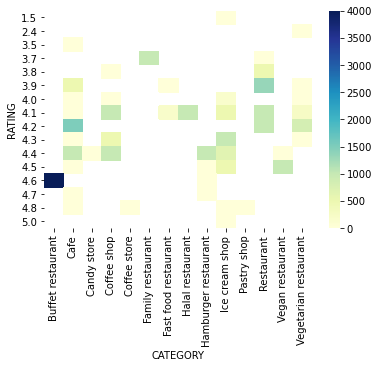

In [115]:
heatmap1_data = pd.pivot_table(restaurantsNewTemp, values='AVG_PRICE', 
                     index=['RATING'], 
                     columns=['CATEGORY'])
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [116]:
restaurantsNewTemp.to_csv('restaurants2.csv')

In [117]:
sample_2 = restaurantsNewTemp.drop(['ADDRESS', 'OPEN_HOURS', 'BUSY_HOURS'], axis = 1)
sample_2.head()

,SHOP_ID,CATEGORY,NAME,RATING,AVG_PRICE,REVIEW_COUNT
54,100055,Ice cream shop,Lucky kiri ice cream parlour,1.5,0,2.0
71,100072,Vegetarian restaurant,SARAVANA BAWAN,2.4,0,7.0
13,100014,Cafe,Balindo Cafe,3.5,0,4.0
33,100034,Family restaurant,Burger Land Family Restaurant,3.7,1000,342.0
15,100016,Restaurant,Barnes Garden Caf,3.7,0,3.0


In [118]:
sample_2['AVG_PRICE'] = np.where(sample_2.AVG_PRICE == 0, 1000, sample_2.AVG_PRICE)

In [119]:
df_explode = restaurantsNewTemp.assign(CATEGORY = restaurantsNewTemp.CATEGORY).explode('CATEGORY')

In [120]:
df_explode[df_explode.CATEGORY.str.contains('Coffee|Cafe', case=True, na=False)].CATEGORY.value_counts()

Cafe            12
Coffee shop      6
Coffee store     1
Name: CATEGORY, dtype: int64

In [121]:
coffee_business = restaurantsNewTemp[restaurantsNewTemp['CATEGORY'].str.contains('Coffee|Cafe', case=False, na=False)]

In [122]:
cb = coffee_business.drop(['ADDRESS', 'OPEN_HOURS', 'BUSY_HOURS'], axis = 1)

In [123]:
sample_2['AVG_PRICE'] = np.where(sample_2.AVG_PRICE == 0, 1000, sample_2.AVG_PRICE)

In [124]:
sample_2.head()

,SHOP_ID,CATEGORY,NAME,RATING,AVG_PRICE,REVIEW_COUNT
54,100055,Ice cream shop,Lucky kiri ice cream parlour,1.5,1000,2.0
71,100072,Vegetarian restaurant,SARAVANA BAWAN,2.4,1000,7.0
13,100014,Cafe,Balindo Cafe,3.5,1000,4.0
33,100034,Family restaurant,Burger Land Family Restaurant,3.7,1000,342.0
15,100016,Restaurant,Barnes Garden Caf,3.7,1000,3.0


In [125]:
cb.head()

,SHOP_ID,CATEGORY,NAME,RATING,AVG_PRICE,REVIEW_COUNT
13,100014,Cafe,Balindo Cafe,3.5,0,4.0
6,100007,Coffee shop,The Coffee Bean Tea Leaf,3.8,0,9.0
17,100018,Cafe,Everyday Bakery And Cafe,3.9,500,45.0
14,100015,Cafe,Coffee And Tea Cafe,4.0,0,47.0
10,100011,Coffee shop,Colombus cafe,4.0,0,1.0


In [126]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,SHOP_ID,REVIEW_ID,LOCAL_GUIDE,NAME,REVIEW_STARS,REVIEW
0,100001,300001,600001,azam hamza,4 stars,But over pricy
1,100001,300002,600002,Dimas Prihadi,5 stars,Always love Java Lounge
2,100001,300003,600003,Udi Keidar,1 star,Bad service~ dissapointing coffee and good. No...
3,100001,300004,600004,Charmi Lankeshwari,5 stars,Lovely strawberry cheesecake... N had alot of ...
4,100001,300005,600005,menaka Indunil,5 stars,Grate place to have a refreshment


In [127]:
cb_1 = pd.merge(cb, reviews , on='SHOP_ID', how='inner')

In [128]:
sample_2 = pd.merge(sample_2, reviews , on='SHOP_ID', how='inner')

In [129]:
sample_2['REVIEW_STARS'] = sample_2['REVIEW_STARS'].astype(str).str.replace(r'\D', '').astype(int)
sample_2.head()

,SHOP_ID,CATEGORY,NAME_x,RATING,AVG_PRICE,REVIEW_COUNT,REVIEW_ID,LOCAL_GUIDE,NAME_y,REVIEW_STARS,REVIEW
0,100055,Ice cream shop,Lucky kiri ice cream parlour,1.5,1000,2.0,300371,600330,Tharanga iTd,2,Leading innovative milk processing organizatio...
1,100055,Ice cream shop,Lucky kiri ice cream parlour,1.5,1000,2.0,300372,NOOB,Ashika Nanayakkara,1,NaN
2,100072,Vegetarian restaurant,SARAVANA BAWAN,2.4,1000,7.0,300523,FALSE,Stephen Reginold,1,Very very poor service. Though they are supply...
3,100072,Vegetarian restaurant,SARAVANA BAWAN,2.4,1000,7.0,300524,FALSE,Santosh Kumar Garg,1,This restaurant has no relation to the world f...
4,100072,Vegetarian restaurant,SARAVANA BAWAN,2.4,1000,7.0,300525,FALSE,Anjali Garg,1,This restaurant is very very bad. It is. It is...


In [130]:
sample_2['REVIEW_COUNT'] = sample_2['REVIEW_COUNT'].astype(int)
sample_2.head()

,SHOP_ID,CATEGORY,NAME_x,RATING,AVG_PRICE,REVIEW_COUNT,REVIEW_ID,LOCAL_GUIDE,NAME_y,REVIEW_STARS,REVIEW
0,100055,Ice cream shop,Lucky kiri ice cream parlour,1.5,1000,2,300371,600330,Tharanga iTd,2,Leading innovative milk processing organizatio...
1,100055,Ice cream shop,Lucky kiri ice cream parlour,1.5,1000,2,300372,NOOB,Ashika Nanayakkara,1,NaN
2,100072,Vegetarian restaurant,SARAVANA BAWAN,2.4,1000,7,300523,FALSE,Stephen Reginold,1,Very very poor service. Though they are supply...
3,100072,Vegetarian restaurant,SARAVANA BAWAN,2.4,1000,7,300524,FALSE,Santosh Kumar Garg,1,This restaurant has no relation to the world f...
4,100072,Vegetarian restaurant,SARAVANA BAWAN,2.4,1000,7,300525,FALSE,Anjali Garg,1,This restaurant is very very bad. It is. It is...


In [131]:
sample_2 = sample_2[sample_2['REVIEW_STARS'] != 3]
sample_2['SENTIMENT'] = sample_2['REVIEW_STARS'].apply(lambda rating : +1 if rating > 3 else -1)

In [132]:
sample_2['SENTIMENT'] = sample_2['SENTIMENT'].replace({-1 : 'negative'})
sample_2['SENTIMENT'] = sample_2['SENTIMENT'].replace({1 : 'positive'})

In [133]:
sample_2.to_csv("sample_2.csv")

In [134]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy>=1.6.1 in c:\users\pasin\anaconda3\lib\site-packages (from wordcloud) (1.18.5)



In [135]:
  import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud 
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pasin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
sample_2.head()

,SHOP_ID,CATEGORY,NAME_x,RATING,AVG_PRICE,REVIEW_COUNT,REVIEW_ID,LOCAL_GUIDE,NAME_y,REVIEW_STARS,REVIEW,SENTIMENT
0,100055,Ice cream shop,Lucky kiri ice cream parlour,1.5,1000,2,300371,600330,Tharanga iTd,2,Leading innovative milk processing organizatio...,negative
1,100055,Ice cream shop,Lucky kiri ice cream parlour,1.5,1000,2,300372,NOOB,Ashika Nanayakkara,1,NaN,negative
2,100072,Vegetarian restaurant,SARAVANA BAWAN,2.4,1000,7,300523,FALSE,Stephen Reginold,1,Very very poor service. Though they are supply...,negative
3,100072,Vegetarian restaurant,SARAVANA BAWAN,2.4,1000,7,300524,FALSE,Santosh Kumar Garg,1,This restaurant has no relation to the world f...,negative
4,100072,Vegetarian restaurant,SARAVANA BAWAN,2.4,1000,7,300525,FALSE,Anjali Garg,1,This restaurant is very very bad. It is. It is...,negative


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline


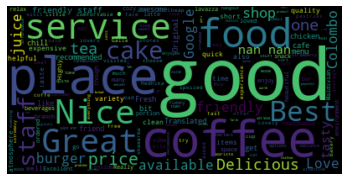

In [138]:
stopwords = set(stopwords.words("english"))
stopwords.update(["br", "href"])
textt = " ".join(str(review) for review in cb_1.REVIEW)

wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [139]:
cb_1['REVIEW_STARS'] = cb_1['REVIEW_STARS'].astype(str).str.replace(r'\D', '').astype(int)

In [140]:
cb_1.head()

,SHOP_ID,CATEGORY,NAME_x,RATING,AVG_PRICE,REVIEW_COUNT,REVIEW_ID,LOCAL_GUIDE,NAME_y,REVIEW_STARS,REVIEW
0,100014,Cafe,Balindo Cafe,3.5,0,4.0,300094,FALSE,Jade Senaratne,2,Its not a fancy location~ but it is a good pla...
1,100014,Cafe,Balindo Cafe,3.5,0,4.0,300095,FALSE,MassSpreadz David,5,Good Place
2,100014,Cafe,Balindo Cafe,3.5,0,4.0,300096,NOOB,Indrani Wijesekara,3,NaN
3,100014,Cafe,Balindo Cafe,3.5,0,4.0,300097,600080,Jeewaka Hettige,4,NaN
4,100007,Coffee shop,The Coffee Bean Tea Leaf,3.8,0,9.0,300057,600053,Nidhya Logeswaran,1,visited the one Galle face branch which has an...


In [141]:
cb_2 = cb_1[cb_1['REVIEW_STARS'] != 3]
cb_2['sentiment'] = cb_2['REVIEW_STARS'].apply(lambda rating : +1 if rating > 3 else -1)

<ipython-input-141-f4e35a9385ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb_2['sentiment'] = cb_2['REVIEW_STARS'].apply(lambda rating : +1 if rating > 3 else -1)


In [142]:
cb_2.head()

,SHOP_ID,CATEGORY,NAME_x,RATING,AVG_PRICE,REVIEW_COUNT,REVIEW_ID,LOCAL_GUIDE,NAME_y,REVIEW_STARS,REVIEW,sentiment
0,100014,Cafe,Balindo Cafe,3.5,0,4.0,300094,FALSE,Jade Senaratne,2,Its not a fancy location~ but it is a good pla...,-1
1,100014,Cafe,Balindo Cafe,3.5,0,4.0,300095,FALSE,MassSpreadz David,5,Good Place,1
3,100014,Cafe,Balindo Cafe,3.5,0,4.0,300097,600080,Jeewaka Hettige,4,NaN,1
4,100007,Coffee shop,The Coffee Bean Tea Leaf,3.8,0,9.0,300057,600053,Nidhya Logeswaran,1,visited the one Galle face branch which has an...,-1
5,100007,Coffee shop,The Coffee Bean Tea Leaf,3.8,0,9.0,300058,600054,bassith mahmood,4,The coffee was good~ a bit sweeter than other ...,1


In [143]:
positive = cb_2[cb_2['sentiment'] == 1]
negative = cb_2[cb_2['sentiment'] == -1]

In [144]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [145]:
cb_2['sentimentt'] = cb_2['sentiment'].replace({-1 : 'negative'})
cb_2['sentimentt'] = cb_2['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(cb_2, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Overall Reviews Sentiment')
fig.show()

<ipython-input-145-372812a98b01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb_2['sentimentt'] = cb_2['sentiment'].replace({-1 : 'negative'})
<ipython-input-145-372812a98b01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb_2['sentimentt'] = cb_2['sentimentt'].replace({1 : 'positive'})


NameError: name 'px' is not defined